In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

## **Exploratory Data Analysis**

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


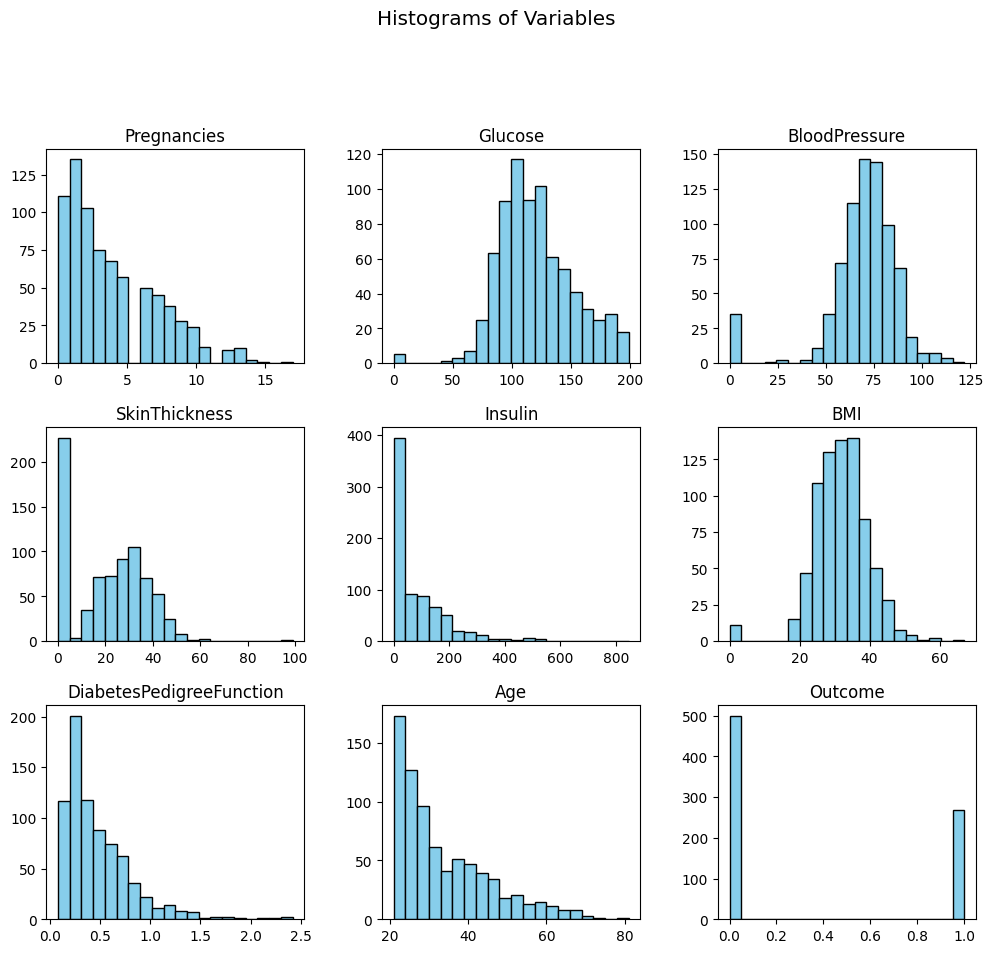

In [7]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black', grid=False)
plt.suptitle('Histograms of Variables', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.show()

Intuition from the above graph is that all the univariate plots have values to be '0' but generally we won't find BP, age,..etc to be 0 so we need to preprocess them

## **Data Preprocessing**

### Handling missing value

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [13]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [14]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [15]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


### Data standardization

In [17]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)

In [18]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [19]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [20]:
df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1


### Splitting the data into training, testing, and validation sets

In [28]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.2)

# Model Building in Python Using Keras

### Modelling

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Normalize the input features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Sequential model
model = Sequential()

# Add the first hidden layer with input dimension
model.add(Dense(32, activation='relu', input_dim=8))

# Add the second hidden layer
model.add(Dense(16, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and accuracy metric
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation data and early stopping
history = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
scores = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {scores[0]}, Test Accuracy: {scores[1]}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                288       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
16/16 [==============================] - 1s 25ms/step - loss: 0.6523 - accuracy: 0.6640 - val_loss: 0.6112 - val_accuracy: 0.7480
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 0.5886 - accuracy: 0.7128 - val_loss: 0.5570 - val_accuracy: 0.7642
Epoch

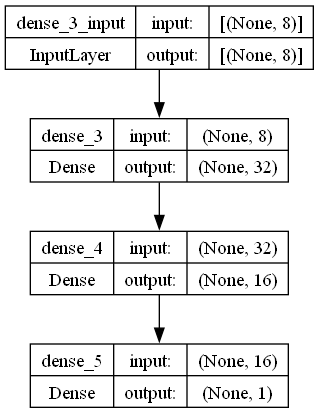

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Save the plot to a file (e.g., 'model_plot.png')
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


### Pickle File

In [33]:
import joblib
joblib.dump(model, 'keras_model.pkl')

['keras_model.pkl']

In [34]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Results Analysis

### Testing accuracy

In [35]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

16/16 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.7739
Training Accuracy: 77.39%

5/5 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7857
Testing Accuracy: 78.57%



### Confusion matrix

In [36]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the model to predict on the test set
y_test_pred_probs = model.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

# Compute the confusion matrix
c_matrix = confusion_matrix(y_test, y_test_pred)

# Extract True Positive (TP), False Positive (FP), False Negative (FN), True Negative (TN)
# These values are useful for further analysis and metrics calculation
TP = c_matrix[1, 1]
FP = c_matrix[0, 1]
FN = c_matrix[1, 0]
TN = c_matrix[0, 0]

# Print the values
print(f"Correctly Predicted Diabetics (True Positive): {TP}")
print(f"Incorrectly Predicted Non-Diabetics as Diabetics (False Positive): {FP}")
print(f"Incorrectly Predicted Diabetics as Non-Diabetics (False Negative): {FN}")
print(f"Correctly Predicted Non-Diabetics (True Negative): {TN}")

# Display the confusion matrix (commented for now)
# plt.figure(figsize=(2, 2))
# sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=['No Diabetes', 'Diabetes'],
#             yticklabels=['No Diabetes', 'Diabetes'])
# plt.title("Confusion Matrix")
# plt.show()


5/5 [==============================] - 0s 3ms/step
Correctly Predicted Diabetics (True Positive): 38
Incorrectly Predicted Non-Diabetics as Diabetics (False Positive): 16
Incorrectly Predicted Diabetics as Non-Diabetics (False Negative): 17
Correctly Predicted Non-Diabetics (True Negative): 83


### AUC-ROC Curve

In [37]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [38]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

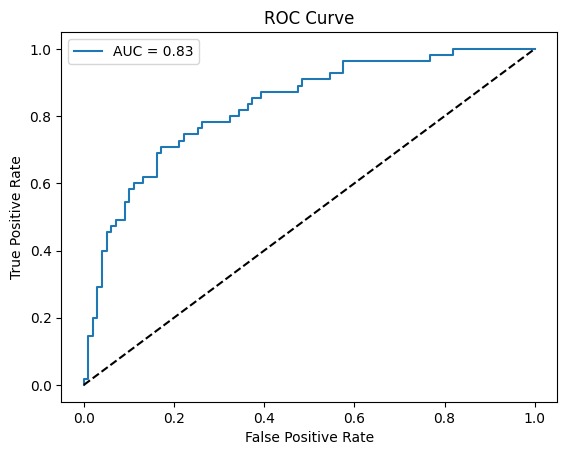

In [44]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_test_pred_probs)
plt.plot(FPR, TPR, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], '--', color='black')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  # Display AUC label in the legend
plt.show()

In [45]:
from sklearn.metrics import classification_report

# Assuming model is your Sequential model
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

# Calculate classification report
classification_rep = classification_report(y_test, y_test_pred, target_names=['No Diabetes', 'Diabetes'])

# Display the classification report
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

 No Diabetes       0.83      0.84      0.83        99
    Diabetes       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.79       154



# Tinker Application

In [ ]:
import tkinter as tk
from tkinter import Label, Entry, Button, messagebox

In [47]:
import tkinter as tk
from tkinter import Label, Entry, Button, messagebox
import joblib

# Tkinter Application
def predict_diabetes(entry_widgets):
    try:
        # Get input values from Tkinter entries
        input_data = [float(entry.get()) for entry in entry_widgets]

        # Load the trained model from the pickle file
        loaded_model = joblib.load('keras_model.pkl')

        # Make a prediction using the loaded model
        prediction = loaded_model.predict([input_data])
        result = "Diabetic" if prediction[0][0] > 0.5 else "Not Diabetic"

        # Display the prediction
        messagebox.showinfo("Prediction", f"The predicted outcome is: {result}")

    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values for all features.")

# Create the Tkinter GUI
app = tk.Tk()
app.title("Diabetes Predictor")

# Create labels and entry widgets for each feature
features = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age']
entry_widgets = []

for i, feature in enumerate(features):
    Label(app, text=feature).grid(row=i, column=0)
    entry = Entry(app)
    entry.grid(row=i, column=1)
    entry_widgets.append(entry)

# Create a button to trigger prediction
Button(app, text="Predict", command=lambda: predict_diabetes(entry_widgets)).grid(row=len(features), column=0, columnspan=2)

# Run the Tkinter event loop
app.mainloop()


1/1 [==============================] - 0s 59ms/step
